<a href="https://colab.research.google.com/github/gbroy1999/deep-learning/blob/master/titanic_survival_prediction_checkpoint_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns


In [0]:
url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic.shape

(891, 11)

In [0]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [0]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

.sum() provides all the value set together.isnull() only provides the boolean value

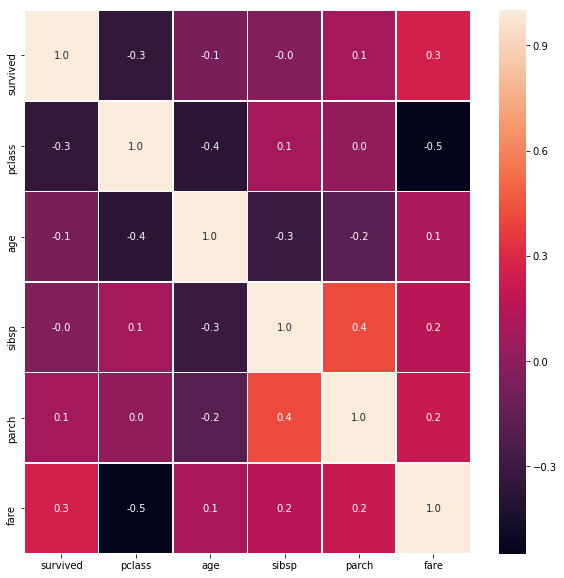

In [0]:
from matplotlib import pyplot as plt

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(titanic.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [0]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [0]:
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
titanic["adult_male"] = titanic.who == "man"
titanic["deck"] = titanic.cabin.str[0]
titanic["embark_town"] = titanic.embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
titanic["alive"] = titanic.survived.map({0: "no", 1: "yes"})
titanic["alone"] = ~(titanic.parch + titanic.sibsp).astype(bool)
titanic = titanic.drop(["name", "ticket", "cabin"], axis=1)

In [0]:
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [0]:
titanic["sclass"]=titanic.class.map({"First":1,"Second":2,"Third":3})

SyntaxError: ignored

In [0]:
lst=[]
for i in titanic["who"]:
  for j in titanic["pclass"]:
    if i=="woman" and j==1:
      lst=lst+[1]
    elif i=="woman" and j==2:
      lst=lst+[2]
    elif i=="woman" and j==3:
      lst=lst+[3]
print(lst)

[3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1, 3, 2, 3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 2, 3, 2, 2, 1, 1, 3, 3, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 1, 

In [0]:
len(lst)


241461

In [0]:
#To count the number of males and females

sns.countplot(x='sex',data=titanic);

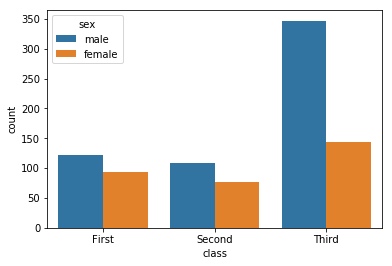

In [0]:
#Then we can look at how this is distributed into the three classes

sns.countplot(x='class',hue='sex',data=titanic,order=['First','Second','Third']);

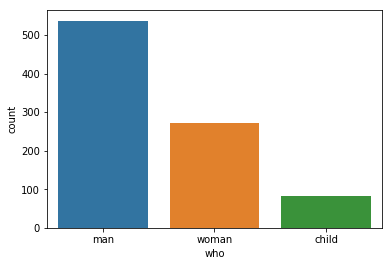

In [0]:
sns.countplot(x="who", data=titanic);

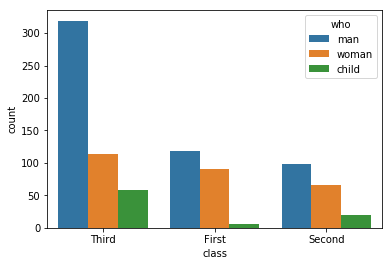

In [0]:
sns.countplot(x="class", data=titanic, hue='who');

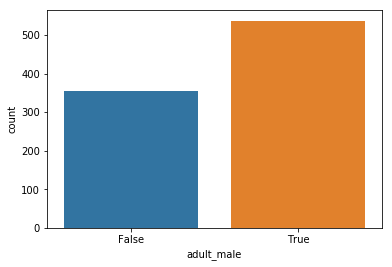

In [0]:
sns.countplot(x="adult_male", data=titanic);

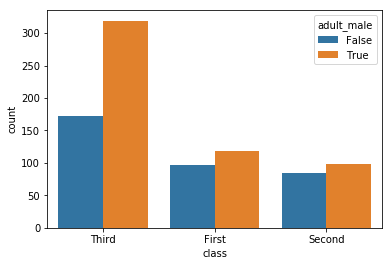

In [0]:
sns.countplot(x="class", data=titanic, hue="adult_male");

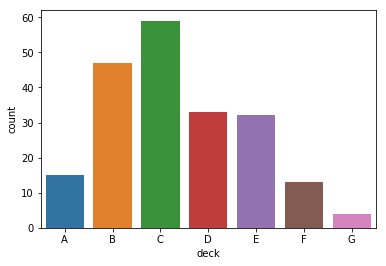

In [0]:
sns.countplot("deck", data=titanic,order=['A','B','C','D','E','F','G']);

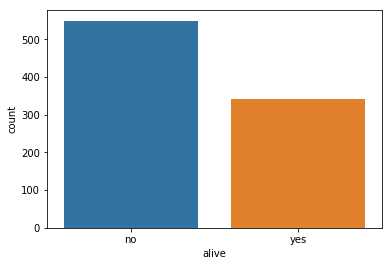

In [0]:
sns.countplot("alive", data=titanic);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


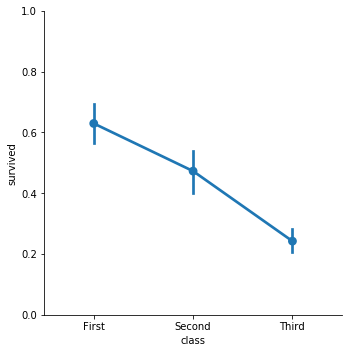

In [0]:
sns.factorplot("class", "survived", data=titanic, order=['First','Second','Third']).set(ylim=(0, 1));

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


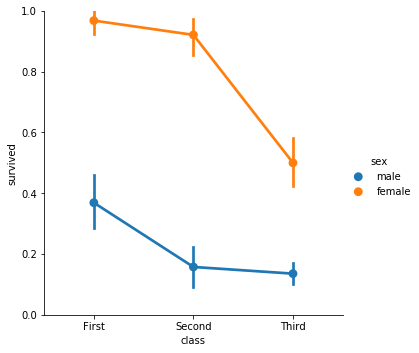

In [0]:
sns.factorplot("class", "survived", data=titanic, hue="sex",order=['First','Second','Third']).set(ylim=(0, 1));

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


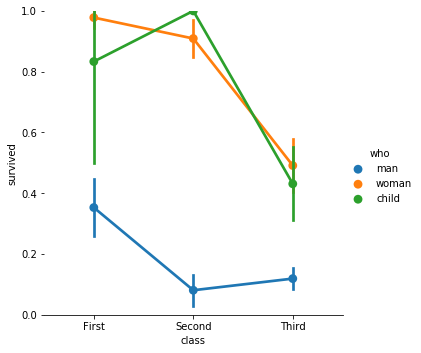

In [0]:
fg = sns.factorplot("class", "survived", data=titanic, hue="who", aspect=1, order=['First','Second','Third'])
fg.set(ylim=(0, 1))
fg.despine(left=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


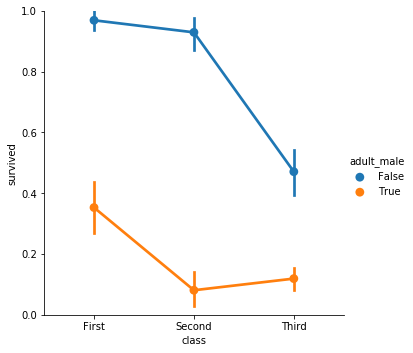

In [0]:
sns.factorplot("class", "survived", data=titanic, hue="adult_male", order=['First','Second','Third']).set(ylim=(0, 1))


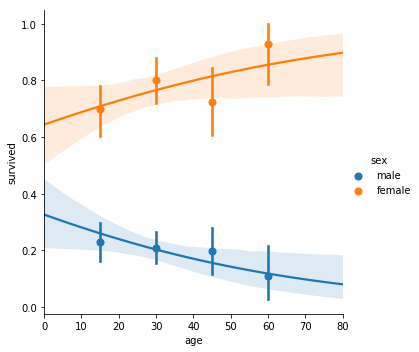

In [0]:
age_bins = [15, 30, 45, 60]
sns.lmplot("age", "survived", titanic, hue="sex",
           x_bins=age_bins, logistic=True).set(xlim=(0, 80));

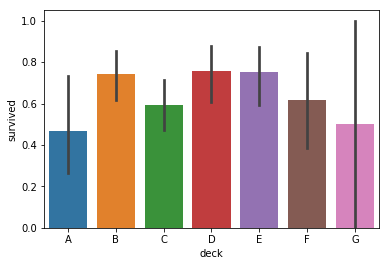

In [0]:
sns.barplot("deck", "survived", data=titanic,order=['A','B','C','D','E','F','G']);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


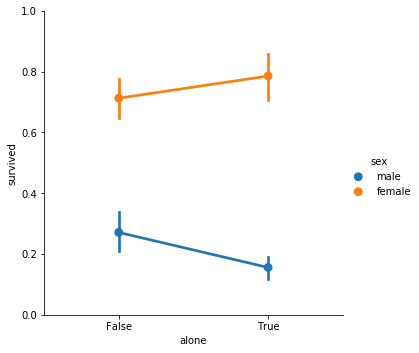

In [0]:
sns.factorplot("alone", "survived", data=titanic, hue="sex").set(ylim=(0, 1));

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


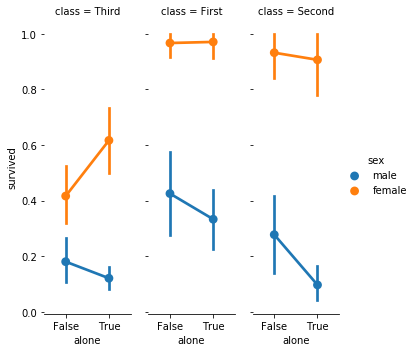

In [0]:
fg = sns.factorplot("alone", "survived", data=titanic, hue="sex",
                    col="class", aspect=.33)
fg.despine(left=True);

In [0]:
dk = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
titanic['deck']=titanic.deck.map(dk)

In [0]:
titanic['deck']=titanic['deck'].fillna(0)

In [0]:
mean = titanic["age"].mean()
std = titanic["age"].std()
rand_age = np.random.randint(mean - std, mean + std, size = titanic['age'].isnull().sum())
age_slice = titanic["age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic["age"] = age_slice
   

In [0]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [0]:
titanic['embarked']=titanic['embarked'].fillna('S')

In [0]:
genders = {"male": 0, "female": 1}
titanic['sex'] = titanic['sex'].map(genders)

In [0]:
titanic['sex']


0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     0
22     1
23     0
24     1
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    1
864    0
865    1
866    1
867    0
868    0
869    0
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    1
883    0
884    0
885    1
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [0]:
titanic['age'] = titanic['age'].astype(int)
titanic.loc[ titanic['age'] <= 11, 'age'] = 0
titanic.loc[(titanic['age'] > 11) & (titanic['age'] <= 18), 'age'] = 1
titanic.loc[(titanic['age'] > 18) & (titanic['age'] <= 22), 'age'] = 2
titanic.loc[(titanic['age'] > 22) & (titanic['age'] <= 27), 'age'] = 3
titanic.loc[(titanic['age'] > 27) & (titanic['age'] <= 33), 'age'] = 4
titanic.loc[(titanic['age'] > 33) & (titanic['age'] <= 40), 'age'] = 5
titanic.loc[(titanic['age'] > 40) & (titanic['age'] <= 66), 'age'] = 6
titanic.loc[ titanic['age'] > 66, 'age'] = 6


In [0]:
wh = {'child':3,'woman':2, 'man':1}
titanic['who']=titanic.who.map(wh)

In [0]:
e = {'S':3,'Q':2, 'C':1}
titanic['embarked']=titanic.embarked.map(e)

In [0]:
drop_lis=['class','embark_town','alive']
titanic=titanic.drop(drop_lis,axis=1)

In [0]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,0,2,1,0,7.2500,3,1,True,0.0,False
1,1,1,1,5,1,0,71.2833,1,2,False,3.0,False
2,1,3,1,3,0,0,7.9250,3,2,False,0.0,True
3,1,1,1,5,1,0,53.1000,3,2,False,3.0,False
4,0,3,0,5,0,0,8.0500,3,1,True,0.0,True
5,0,3,0,1,0,0,8.4583,2,1,True,0.0,True
6,0,1,0,6,0,0,51.8625,3,1,True,5.0,True
7,0,3,0,0,3,1,21.0750,3,3,False,0.0,False
8,1,3,1,3,0,2,11.1333,3,2,False,0.0,False
9,1,2,1,1,1,0,30.0708,1,3,False,0.0,False


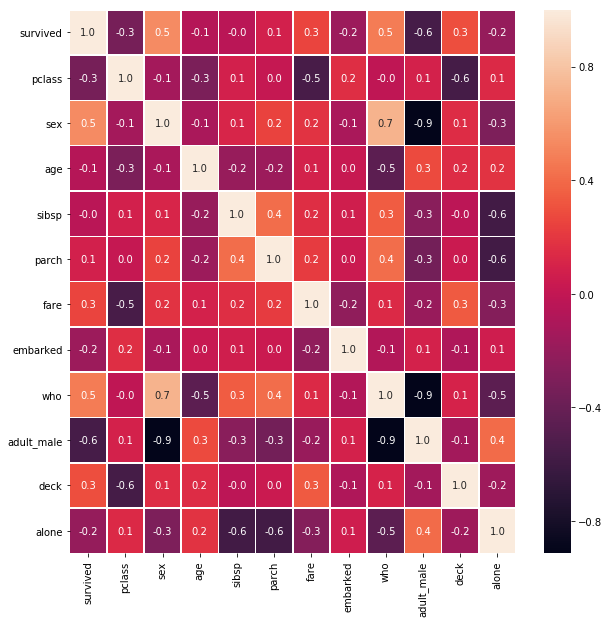

In [0]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(titanic.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


In [0]:
titanic.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
deck          0
alone         0
dtype: int64

In [0]:
X_train = titanic.drop("survived", axis=1)
Y_train = titanic["survived"]


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)


lr = LogisticRegression()
lr = lr.fit(x_train,y_train)
act = accuracy_score(y_train,lr.predict(x_train))
print('Train Accuracy is: ',(act*100))
ac = accuracy_score(y_test,lr.predict(x_test))
print('Test Accuracy is: ',(ac*100))


Train Accuracy is:  82.8250401284109
Test Accuracy is:  80.97014925373134


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
